<a href="https://colab.research.google.com/github/Vite-Noiz/Machine-Learning-Course/blob/main/LS%20and%20RLS/rls_recursive_least_squares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recursive Least Squares
<div style="border-radius:10px; border:#E57C23 solid ; padding: 15px; background-color: #FFFAF0; font-size:120%; text-align:left"><div style="background-color:#fff1cc">RLS stands for Recursive Least Squares. It is an algorithm used in machine learning for estimating the parameters of a linear regression model. The algorithm is used to update the model as new data becomes available. The RLS algorithm is based on the least squares method, which is used to find the best fit line for a set of data points. The RLS algorithm is particularly useful when the data is noisy or when there are more variables than observations<br><br>
    
    
<div style="background-color:#fff1cc">The RecursiveLS class allows computation of recursive residuals and computes CUSUM and CUSUM of squares statistics. Plotting these statistics along with reference lines denoting statistically significant deviations from the null hypothesis of stable parameters allows an easy visual indication of parameter stability.</div>
</div>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pandas_datareader.data import DataReader

np.set_printoptions(suppress=True)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**We first consider parameter stability in the copper dataset**

In [ ]:
print(sm.datasets.copper.DESCRLONG)

dta = sm.datasets.copper.load_pandas().data
dta.index = pd.date_range("1951-01-01", "1975-01-01", freq="AS")
endog = dta["WORLDCONSUMPTION"]

# To the regressors in the dataset, we add a column of ones for an intercept
exog = sm.add_constant(
    dta[["COPPERPRICE", "INCOMEINDEX", "ALUMPRICE", "INVENTORYINDEX"]]
)


This data describes the world copper market from 1951 through 1975.  In an
example, in Gill, the outcome variable (of a 2 stage estimation) is the world
consumption of copper for the 25 years.  The explanatory variables are the
world consumption of copper in 1000 metric tons, the constant dollar adjusted
price of copper, the price of a substitute, aluminum, an index of real per
capita income base 1970, an annual measure of manufacturer inventory change,
and a time trend.



**The recursive coefficients are available in the recursive_coefficients attribute. Alternatively, plots can generated using the plot_recursive_coefficient method.**

In [ ]:
mod = sm.RecursiveLS(endog, exog)
res = mod.fit()

print(res.summary())


                           Statespace Model Results                           
Dep. Variable:       WORLDCONSUMPTION   No. Observations:                   25
Model:                    RecursiveLS   Log Likelihood                -154.720
Date:                Sat, 05 Aug 2023   R-squared:                       0.965
Time:                        11:24:12   AIC                            319.441
Sample:                    01-01-1951   BIC                            325.535
                         - 01-01-1975   HQIC                           321.131
Covariance Type:            nonrobust   Scale                       117717.127
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6562.3719   2378.939     -2.759      0.006   -1.12e+04   -1899.737
COPPERPRICE      -13.8132     15.041     -0.918      0.358     -43.292      15.666
INCOMEINDEX      1.21e+04    763.401

[     2.88890087      4.94795049   1558.41803044   1958.43326658
 -51474.9578655   -4168.94974192  -2252.61351128   -446.55908507
  -5288.39794736  -6942.31935786  -7846.0890355   -6643.15121393
  -6274.11015558  -7272.01696292  -6319.02648554  -5822.23929148
  -6256.30902754  -6737.4044603   -6477.42841448  -5995.90746904
  -6450.80677813  -6022.92166487  -5258.35152753  -5320.89136363
  -6562.37193573]


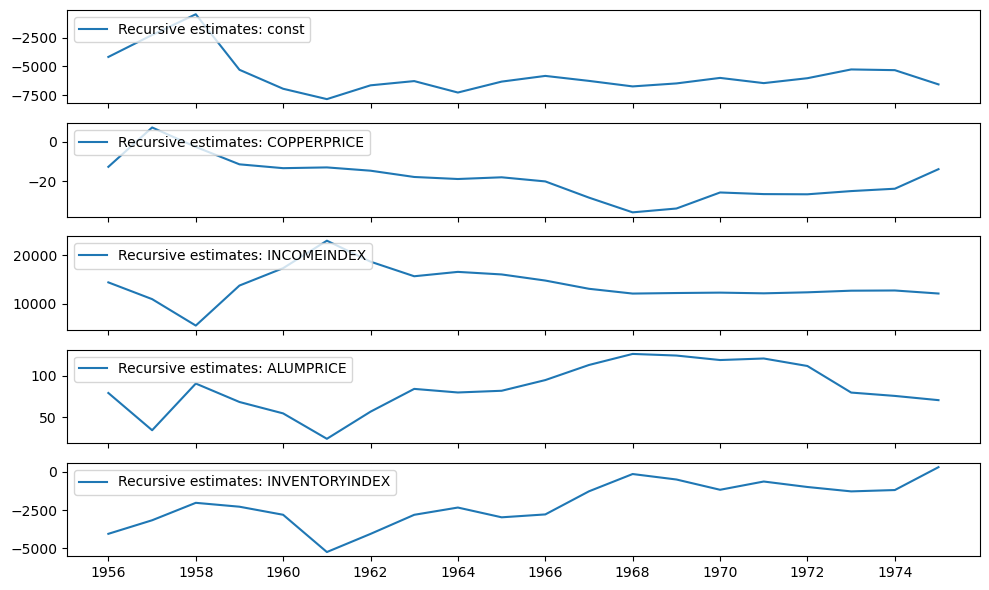

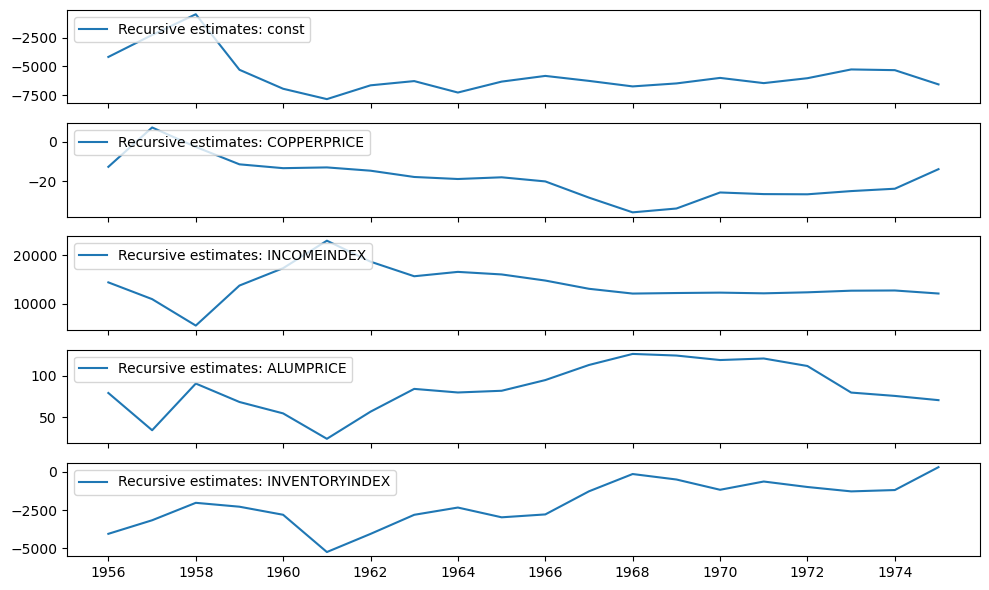

In [ ]:
print(res.recursive_coefficients.filtered[0])
res.plot_recursive_coefficient(range(mod.k_exog), alpha=None, figsize=(10, 6))


**The CUSUM statistic is available in the cusum attribute, but usually it is more convenient to visually check for parameter stability using the plot_cusum method. In the plot below, the CUSUM statistic does not move outside of the 5% significance bands, so we fail to reject the null hypothesis of stable parameters at the 5% level.**

[ 0.69971508  0.65841244  1.24629674  2.05476032  2.39888918  3.1786198
  2.67244672  2.01783215  2.46131747  2.05268638  0.95054336 -1.04505546
 -2.55465286 -2.29908152 -1.45289492 -1.95353993 -1.3504662   0.15789829
  0.6328653  -1.48184586]


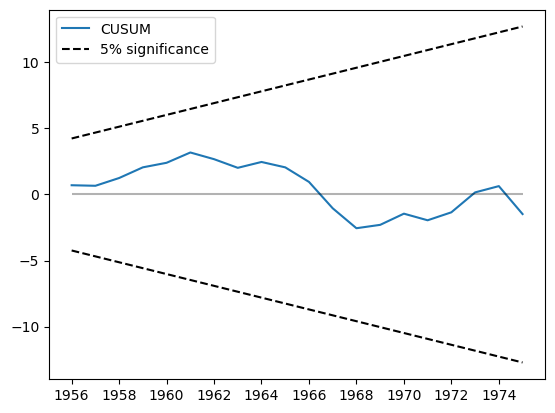

In [ ]:
print(res.cusum)
fig = res.plot_cusum()


**Another related statistic is the CUSUM of squares. It is available in the cusum_squares attribute, but it is similarly more convenient to check it visually, using the plot_cusum_squares method. In the plot below, the CUSUM of squares statistic does not move outside of the 5% significance bands, so we fail to reject the null hypothesis of stable parameters at the 5% level.**

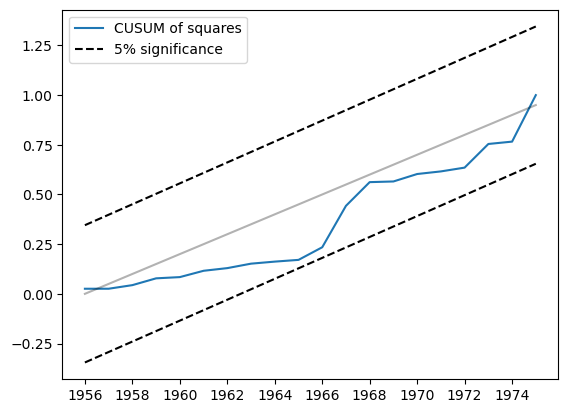

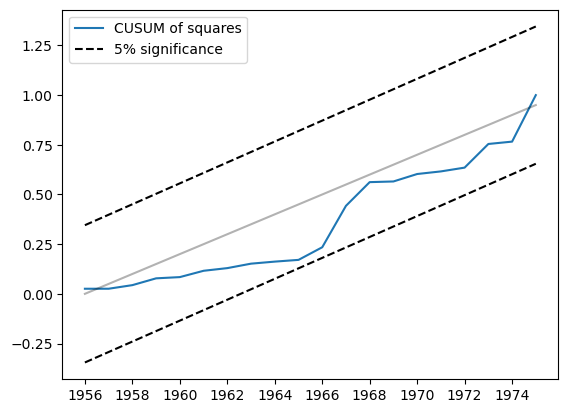

In [ ]:
res.plot_cusum_squares()


### Linear restrictions
 implement linear restrictions using the constraints parameter in constructing the model.

In [ ]:
endog = dta["WORLDCONSUMPTION"]
exog = sm.add_constant(
    dta[["COPPERPRICE", "INCOMEINDEX", "ALUMPRICE", "INVENTORYINDEX"]]
)

mod = sm.RecursiveLS(endog, exog, constraints="COPPERPRICE = ALUMPRICE")
res = mod.fit()
print(res.summary())


                           Statespace Model Results                           
Dep. Variable:       WORLDCONSUMPTION   No. Observations:                   25
Model:                    RecursiveLS   Log Likelihood                -134.231
Date:                Sat, 05 Aug 2023   R-squared:                       0.989
Time:                        11:24:16   AIC                            276.462
Sample:                    01-01-1951   BIC                            281.338
                         - 01-01-1975   HQIC                           277.814
Covariance Type:            nonrobust   Scale                       137155.014
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4839.4836   2412.410     -2.006      0.045   -9567.721    -111.246
COPPERPRICE        5.9797     12.704      0.471      0.638     -18.921      30.880
INCOMEINDEX     1.115e+04    666.308

### Formula
We can fit the same model using the class method from_formula

In [ ]:
mod = sm.RecursiveLS.from_formula(
    "WORLDCONSUMPTION ~ COPPERPRICE + INCOMEINDEX + ALUMPRICE + INVENTORYINDEX",
    dta,
    constraints="COPPERPRICE = ALUMPRICE",
)
res = mod.fit()
print(res.summary())


                           Statespace Model Results                           
Dep. Variable:       WORLDCONSUMPTION   No. Observations:                   25
Model:                    RecursiveLS   Log Likelihood                -134.231
Date:                Sat, 05 Aug 2023   R-squared:                       0.989
Time:                        11:24:16   AIC                            276.462
Sample:                    01-01-1951   BIC                            281.338
                         - 01-01-1975   HQIC                           277.814
Covariance Type:            nonrobust   Scale                       137155.014
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -4839.4836   2412.410     -2.006      0.045   -9567.721    -111.246
COPPERPRICE        5.9797     12.704      0.471      0.638     -18.921      30.880
INCOMEINDEX     1.115e+04    666.308

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Source: https://www.statsmodels.org/stable/examples/notebooks/generated/recursive_ls.html#Linear-restrictions

## <div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:120%; text-align:center">Thanks for Viewing, If this was helpful, a vote is appreciated ❤️
</div>